(7359,)


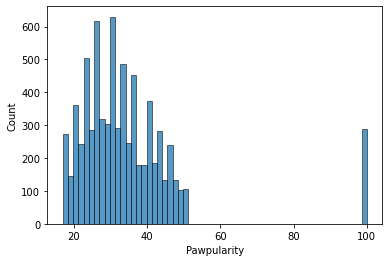

In [6]:
from dataloaders.regression_dataloader import RandomGeneratorDataset
from sklearn.svm import SVR
import numpy as np
dataset=RandomGeneratorDataset('Dataset/train.csv',38,10,100)
dataset.plot_y_hist()

In [7]:
X,Y=[],[]
for ii in range(len(dataset)):
    i,o =dataset[ii]
    X.append(i)
    Y.append(o)
X=np.array(X).reshape((len(dataset),1))
Y=np.array(Y)
print(X)
print(Y)

[[0.2790006 ]
 [0.23789086]
 [0.29718801]
 ...
 [0.39823325]
 [0.38692959]
 [0.64135758]]
[0.28 0.24 0.3  ... 0.4  0.39 0.5 ]


In [8]:
model=SVR(kernel='sigmoid')
model.fit(X,Y)

SVR()

In [9]:
new_x=np.random.normal(38,50,(20,1))
print(new_x.T)
print(model.predict(new_x))

[[ 25.60601066 103.90469576  58.35183083  56.36093914  36.35220882
   42.2032009   58.16642178   4.74443671  18.6267464   31.78023511
   55.64939603  25.11342129  57.03159738 -55.42544599  65.64544953
    1.28936878  -4.55574546  69.22016695 -40.45809618 139.88166039]]
[0.44960957 0.44960957 0.44960957 0.44960957 0.44960957 0.44960957
 0.44960957 0.44960957 0.44960957 0.44960957 0.44960957 0.44960957
 0.44960957 0.44960957 0.44960957 0.44960957 0.44960957 0.44960957
 0.44960957 0.44960957]


In [5]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import math
target_df=pd.read_csv('Dataset/train.csv')
target_df=target_df[['Id','Pawpularity']]
pred_batch=np.zeros((10,target_df.shape[0]))
for i in range(10):
    pred=model.predict(np.random.normal(38,50,(target_df.shape[0],1)))
    # pred[pred>65]=100
    pred_batch[i,:]= pred
df={'Id':target_df['Id'].to_list(),'Pawpularity':pred_batch.mean(axis=0).tolist()}
df=pd.DataFrame(df)
rmse_val=math.sqrt(mean_squared_error(df['Pawpularity'],target_df['Pawpularity']))
print(rmse_val)

42.772675568626305


In [55]:
from joblib import dump, load
dump(model, 'svr_1.joblib') 
# with open('svr.pkl','w')as f:
#     pickle.dump(model,f)

['svr_1.joblib']